#  Exploratory Data Analysis (EDA) 

##  Project Overview
- **Goal:** Battery Range & Health Prediction
- **Dataset:** https://www.kaggle.com/datasets/ziya07/adas-ev-dataset
- **Target Variable:** 

The data contains the following information:

- Vehicle Telemetry: Speed, acceleration, battery level, energy consumption.- 
Sensor Data: Obstacle distance, lane deviation, brake intensity, regenerative braking usag.- 
Environmental Factors: Weather conditions, traffic density, road type- .
Driver Behavior: Steering angle, reaction ti-me.me.

In [1]:
! pip install statsmodels

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

##  1. Data Preview
- Shape of the dataset (rows, columns)
- Data types and structure
- Sample rows (head and tail)

In [3]:
battery_data = pd.read_csv(r"D:\Protfolio_Projects\battery-health-prediction\Data\ADAS_EV_Dataset.csv")
battery_data.head()

,timestamp,speed_kmh,acceleration_mps2,brake_intensity,battery_level,energy_consumption,regen_braking_usage,lane_deviation,obstacle_distance,traffic_density,weather_condition,road_type,steering_angle,reaction_time,ADAS_output
0,2023-01-01 00:00:00,44.944814,-0.758155,0.729998,65.623734,0.667933,84.723658,0.966221,4.266110,41,Rainy,Highway,13.582336,2.094568,Brake
1,2023-01-01 00:00:01,114.085717,-1.002527,0.184512,48.632783,0.280154,49.451704,1.524408,82.850462,23,Foggy,Urban,-11.512973,2.318870,Lane Correct
2,2023-01-01 00:00:02,87.839273,-1.943077,0.346640,96.627360,0.340083,19.546561,-0.147280,24.930758,12,Rainy,Rural,-22.073883,2.128859,Maintain Speed
3,2023-01-01 00:00:03,71.839018,0.643600,0.663281,25.802953,0.443275,73.664179,-0.843285,28.393736,34,Sunny,Highway,-9.533481,0.497469,Maintain Speed
4,2023-01-01 00:00:04,18.722237,-0.140255,0.482089,60.846360,0.486941,41.867814,-0.724614,22.624528,15,Sunny,Urban,2.728121,0.959573,Accelerate


In [4]:
battery_data.shape

(10000, 15)

In [5]:
battery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            10000 non-null  object 
 1   speed_kmh            10000 non-null  float64
 2   acceleration_mps2    10000 non-null  float64
 3   brake_intensity      10000 non-null  float64
 4   battery_level        10000 non-null  float64
 5   energy_consumption   10000 non-null  float64
 6   regen_braking_usage  10000 non-null  float64
 7   lane_deviation       10000 non-null  float64
 8   obstacle_distance    10000 non-null  float64
 9   traffic_density      10000 non-null  int64  
 10  weather_condition    10000 non-null  object 
 11  road_type            10000 non-null  object 
 12  steering_angle       10000 non-null  float64
 13  reaction_time        10000 non-null  float64
 14  ADAS_output          10000 non-null  object 
dtypes: float64(10), int64(1), object(4)
m

##  2. Missing Values
- Count of missing values per column"
- Decision: Impute / Drop / Leave as-is

In [6]:
battery_data.isnull().sum()

timestamp              0
speed_kmh              0
acceleration_mps2      0
brake_intensity        0
battery_level          0
energy_consumption     0
regen_braking_usage    0
lane_deviation         0
obstacle_distance      0
traffic_density        0
weather_condition      0
road_type              0
steering_angle         0
reaction_time          0
ADAS_output            0
dtype: int64

- As there no null values we need not have to bother regarding the imputation 

##  3. Data Types and Conversions
- Identify categorical vs numerical features
- Any necessary type conversions?

In [7]:
battery_data.dtypes

timestamp               object
speed_kmh              float64
acceleration_mps2      float64
brake_intensity        float64
battery_level          float64
energy_consumption     float64
regen_braking_usage    float64
lane_deviation         float64
obstacle_distance      float64
traffic_density          int64
weather_condition       object
road_type               object
steering_angle         float64
reaction_time          float64
ADAS_output             object
dtype: object

- Data Type conversion is required from objectss to catogorical data type

In [8]:
cat_cols = ['weather_condition','road_type', 'ADAS_output']
for col in cat_cols:
    battery_data[col] = battery_data[col].astype('category')


In [9]:
battery_data['timestamp'] = pd.to_datetime(battery_data['timestamp'])

In [10]:
battery_data.dtypes

timestamp              datetime64[ns]
speed_kmh                     float64
acceleration_mps2             float64
brake_intensity               float64
battery_level                 float64
energy_consumption            float64
regen_braking_usage           float64
lane_deviation                float64
obstacle_distance             float64
traffic_density                 int64
weather_condition            category
road_type                    category
steering_angle                float64
reaction_time                 float64
ADAS_output                  category
dtype: object

##  4. Duplicates and Outliers
- Check for duplicate rows
- Initial look at outliers in numerical columns

In [11]:
battery_data.duplicated().sum()

0

- There are no duplicates in the dataset tom be handled

In [12]:
num_cols = battery_data.select_dtypes(include=['int64', 'float64']).columns

In [13]:
for col in num_cols:
    Q1 = battery_data[col].quantile(0.25)
    Q3 = battery_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = battery_data[(battery_data[col] < lower_bound) | (battery_data[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")


speed_kmh: 0 outliers
acceleration_mps2: 0 outliers
brake_intensity: 0 outliers
battery_level: 0 outliers
energy_consumption: 0 outliers
regen_braking_usage: 0 outliers
lane_deviation: 0 outliers
obstacle_distance: 0 outliers
traffic_density: 0 outliers
steering_angle: 0 outliers
reaction_time: 0 outliers


- We can see that there is no outliers to be handled

##  5. Univariate Analysis
- Distribution of each numeric variable (histograms)
- Value counts of categorical variables (bar plots)
- Skewness / kurtosis of numerical columns


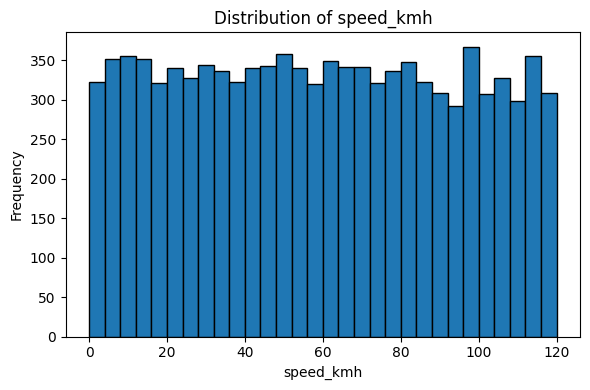

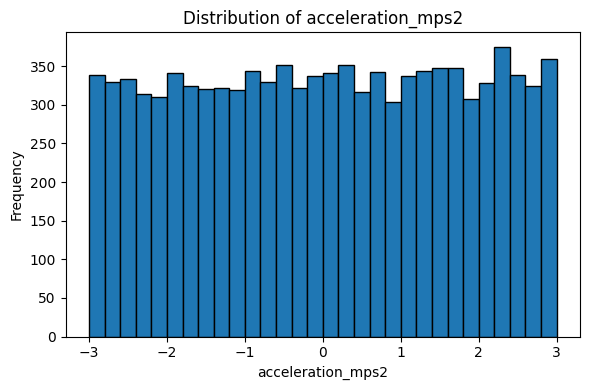

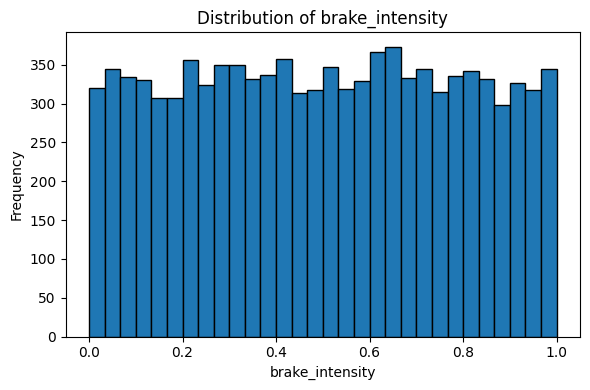

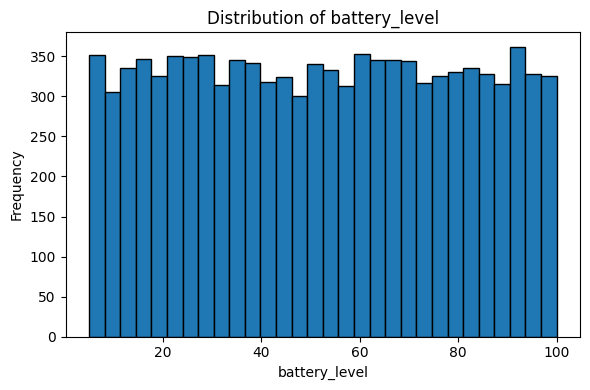

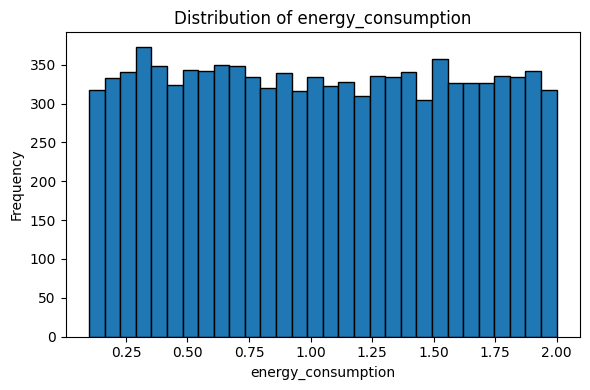

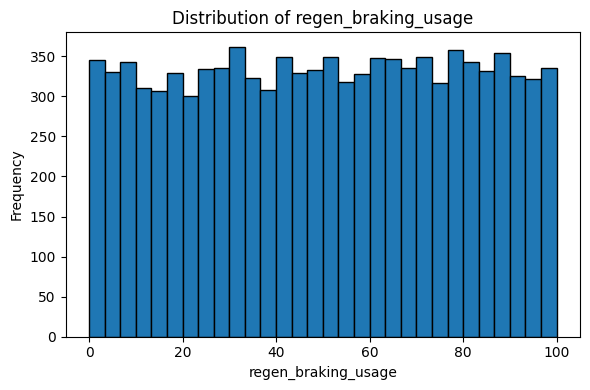

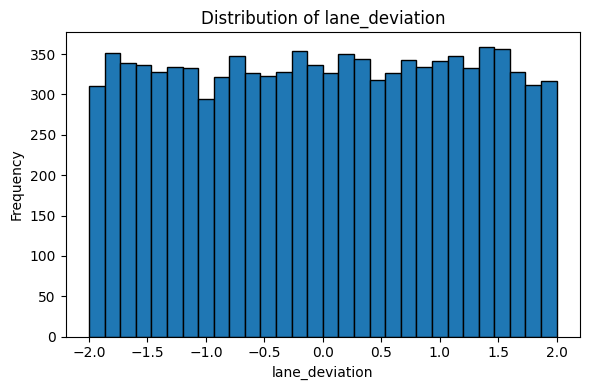

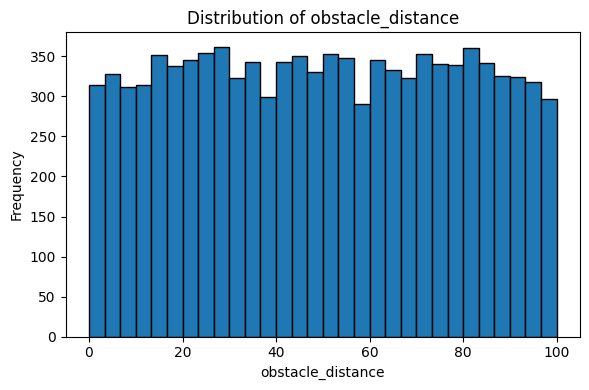

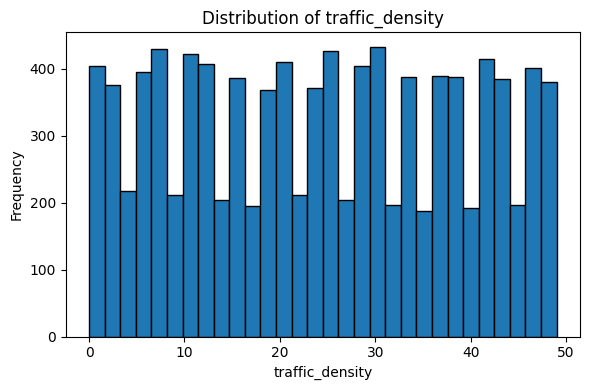

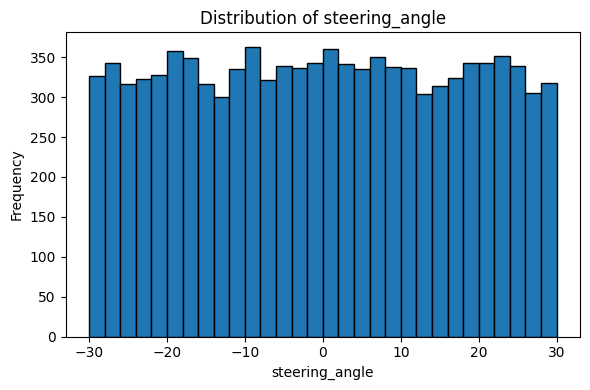

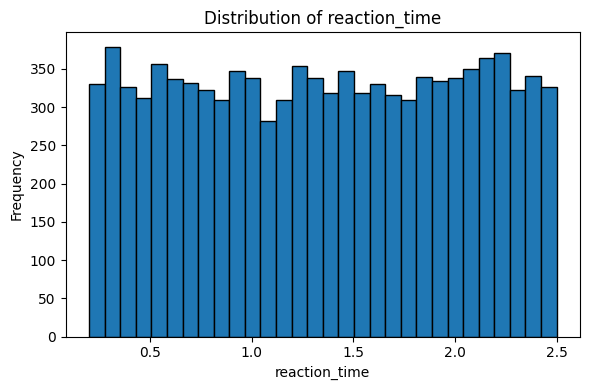

In [14]:
for col in num_cols:
    
    plt.figure(figsize=(6, 4))
    battery_data[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

All fields are evenly distributed

In [15]:
cat_cols = battery_data.select_dtypes(include='category').columns.tolist()

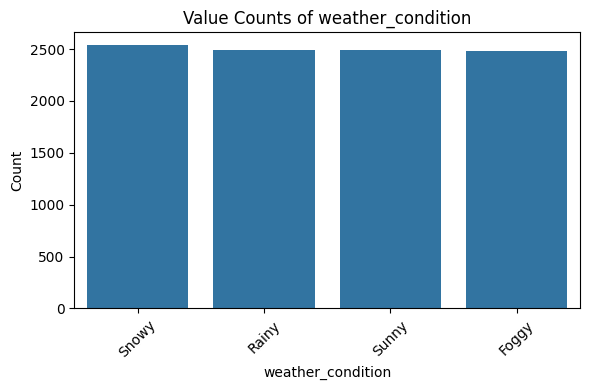

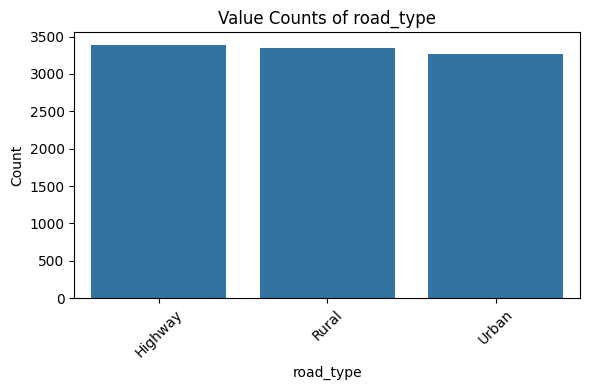

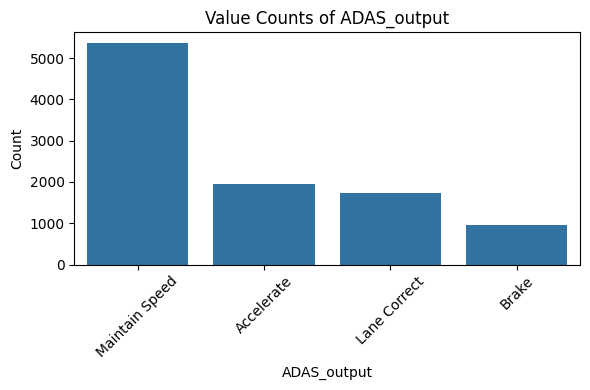

In [16]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=battery_data, x=col, order=battery_data[col].value_counts().index)
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

All categorical features are also evenly distributed
not including ADAS_output so not evaluting the same

In [17]:
# Collect skewness & kurtosis in a list
summary = []
num_cols = battery_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    sk = skew(battery_data[col].dropna())
    kt = kurtosis(battery_data[col].dropna(), fisher=False)  # normal dist has kurtosis = 3
    summary.append({
        'Feature': col,
        'Skewness': round(sk, 2),
        'Kurtosis': round(kt, 2)
    })

# Convert to DataFrame
skew_kurt_df = pd.DataFrame(summary)

# Display the result
skew_kurt_df


,Feature,Skewness,Kurtosis
0,speed_kmh,0.02,1.81
1,acceleration_mps2,-0.02,1.80
2,brake_intensity,-0.00,1.82
3,battery_level,0.00,1.80
4,energy_consumption,0.02,1.79
5,regen_braking_usage,-0.02,1.81
6,lane_deviation,-0.02,1.80
7,obstacle_distance,0.00,1.80
8,traffic_density,0.02,1.80
9,steering_angle,0.00,1.81


In [18]:
for i, row in skew_kurt_df.iterrows():
    feature = row['Feature']
    skew_val = row['Skewness']
    kurt_val = row['Kurtosis']

    print(f"\n {feature}:")
    if abs(skew_val) > 1:
        print(" -  Highly skewed → consider transformation (log/sqrt)")
    elif 0.5 < abs(skew_val) <= 1:
        print(" -  Moderately skewed → optional transform")
    else:
        print(" -  Symmetric → no transform needed")

    if kurt_val > 3.5:
        print(" -  High kurtosis → watch for outliers")
    elif kurt_val < 2.5:
        print(" -  Flat distribution → fewer outliers")
    else:
        print(" -  Normal peakedness")



 speed_kmh:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 acceleration_mps2:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 brake_intensity:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 battery_level:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 energy_consumption:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 regen_braking_usage:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 lane_deviation:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 obstacle_distance:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 traffic_density:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 steering_angle:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 reaction_time:
 -  Symmetric → no transform needed
 -  Fl

- No Transformation required 

## 6. Target Variable 

In [19]:
battery_data.columns

Index(['timestamp', 'speed_kmh', 'acceleration_mps2', 'brake_intensity',
       'battery_level', 'energy_consumption', 'regen_braking_usage',
       'lane_deviation', 'obstacle_distance', 'traffic_density',
       'weather_condition', 'road_type', 'steering_angle', 'reaction_time',
       'ADAS_output'],
      dtype='object')

In [20]:
max_range = 400  

battery_data['estimated_range_km'] = (battery_data['battery_level'] / 100) * max_range

In [21]:
battery_data.head()

,timestamp,speed_kmh,acceleration_mps2,brake_intensity,battery_level,energy_consumption,regen_braking_usage,lane_deviation,obstacle_distance,traffic_density,weather_condition,road_type,steering_angle,reaction_time,ADAS_output,estimated_range_km
0,2023-01-01 00:00:00,44.944814,-0.758155,0.729998,65.623734,0.667933,84.723658,0.966221,4.266110,41,Rainy,Highway,13.582336,2.094568,Brake,262.494936
1,2023-01-01 00:00:01,114.085717,-1.002527,0.184512,48.632783,0.280154,49.451704,1.524408,82.850462,23,Foggy,Urban,-11.512973,2.318870,Lane Correct,194.531132
2,2023-01-01 00:00:02,87.839273,-1.943077,0.346640,96.627360,0.340083,19.546561,-0.147280,24.930758,12,Rainy,Rural,-22.073883,2.128859,Maintain Speed,386.509439
3,2023-01-01 00:00:03,71.839018,0.643600,0.663281,25.802953,0.443275,73.664179,-0.843285,28.393736,34,Sunny,Highway,-9.533481,0.497469,Maintain Speed,103.211811
4,2023-01-01 00:00:04,18.722237,-0.140255,0.482089,60.846360,0.486941,41.867814,-0.724614,22.624528,15,Sunny,Urban,2.728121,0.959573,Accelerate,243.385438


## 7. Bivariate Analysis
- Compare features to target ('estimated_range_km')
- Numerical vs target
- Categorical vs target


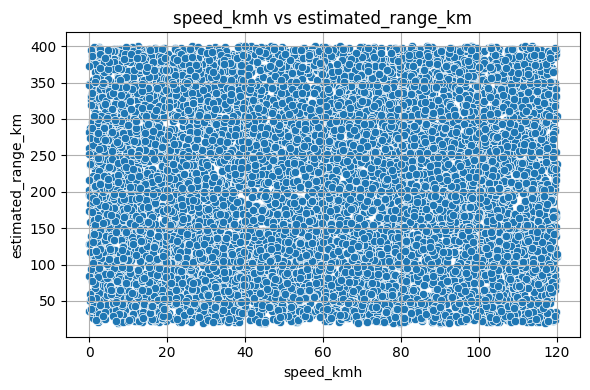

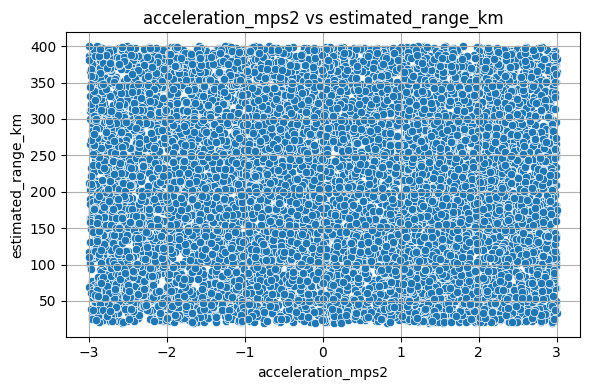

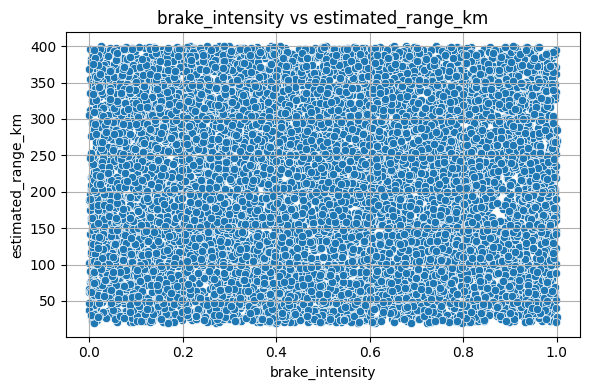

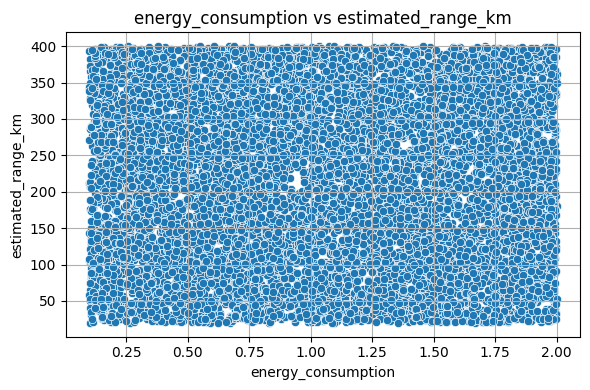

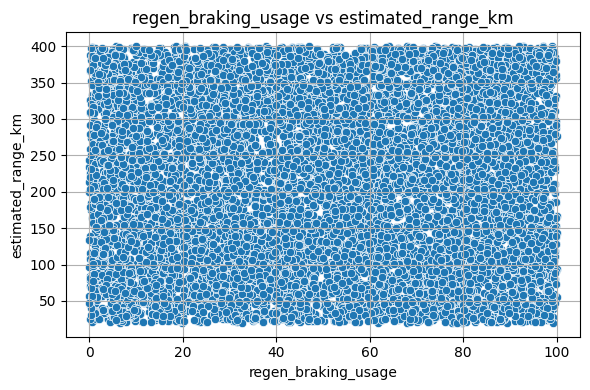

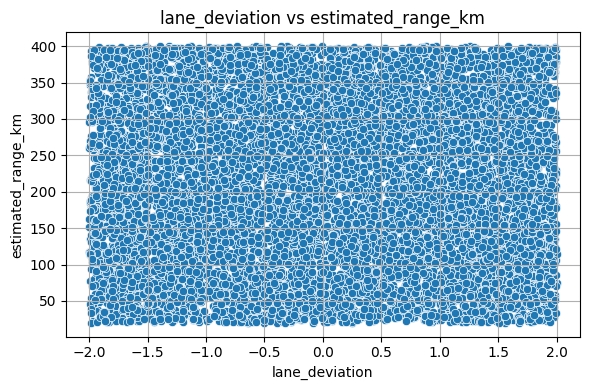

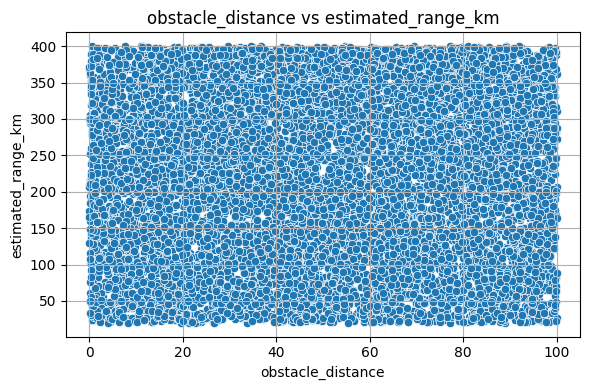

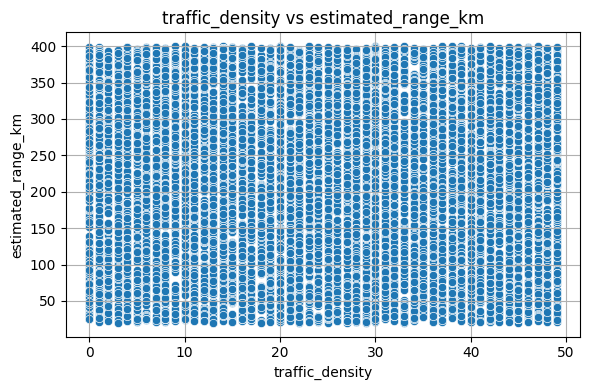

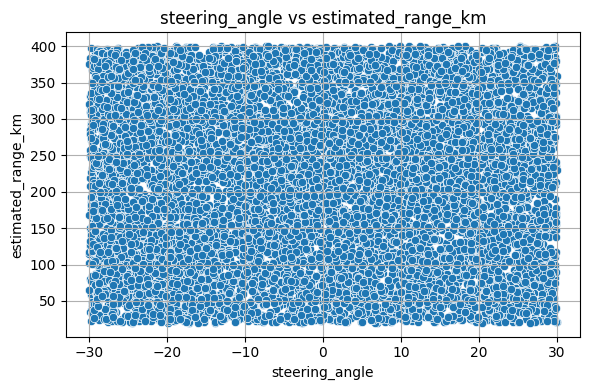

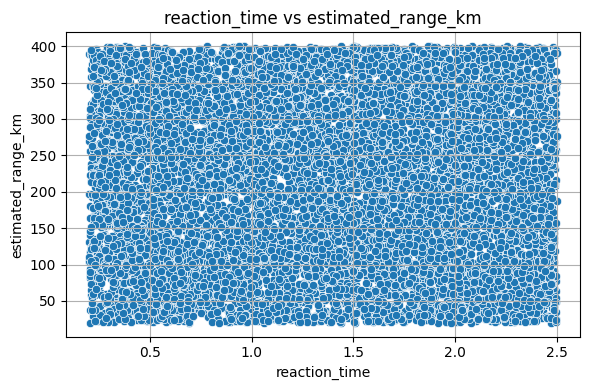

In [22]:

# Set your target column
target = 'estimated_range_km'

# Select numerical features (exclude target and battery_level if used in target)
numeric_cols = battery_data.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target and col != 'battery_level']

# Plot each numerical feature vs target
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=battery_data[col], y=battery_data[target])
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

The numerical features doesn't influence the target

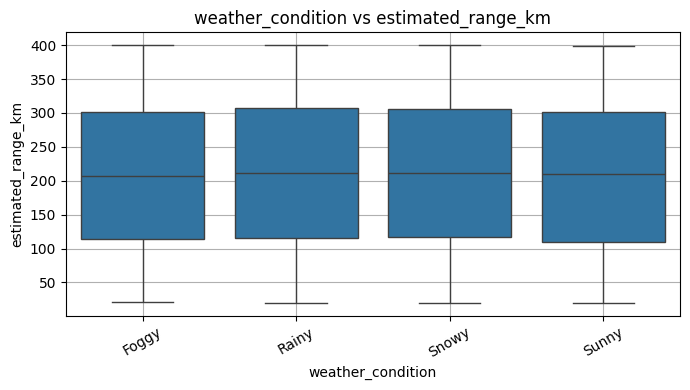

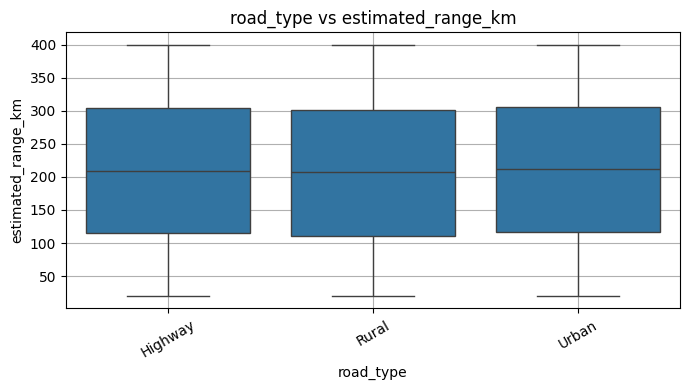

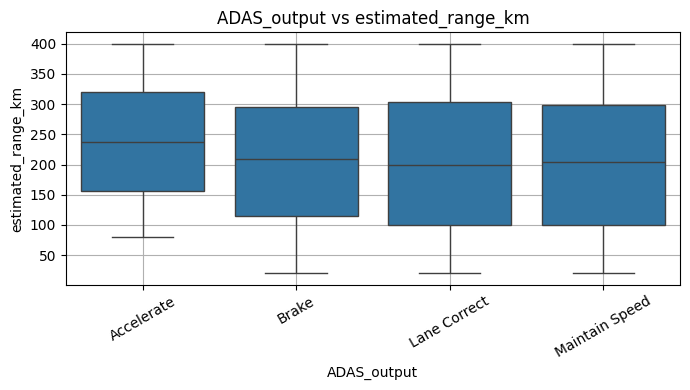

In [23]:
cat_cols = ['weather_condition', 'road_type', 'ADAS_output']
target = 'estimated_range_km'  # or new target if updated

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=col, y=target, data=battery_data)
    plt.title(f'{col} vs {target}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

- No major insights as everything seems equal proportion

The category doesn't influence the target

##  7. Correlation Matrix
- Heatmap of correlation between numerical features
- Note any multicollinearity concerns

In [24]:
num_cols = battery_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = battery_data[num_cols].corr().abs()
target_corr = corr_matrix['estimated_range_km'].sort_values(ascending=False)
print(target_corr)


battery_level          1.000000
estimated_range_km     1.000000
acceleration_mps2      0.021281
traffic_density        0.014615
energy_consumption     0.011476
regen_braking_usage    0.007498
lane_deviation         0.007165
obstacle_distance      0.006983
speed_kmh              0.006309
steering_angle         0.005652
brake_intensity        0.004196
reaction_time          0.002463
Name: estimated_range_km, dtype: float64


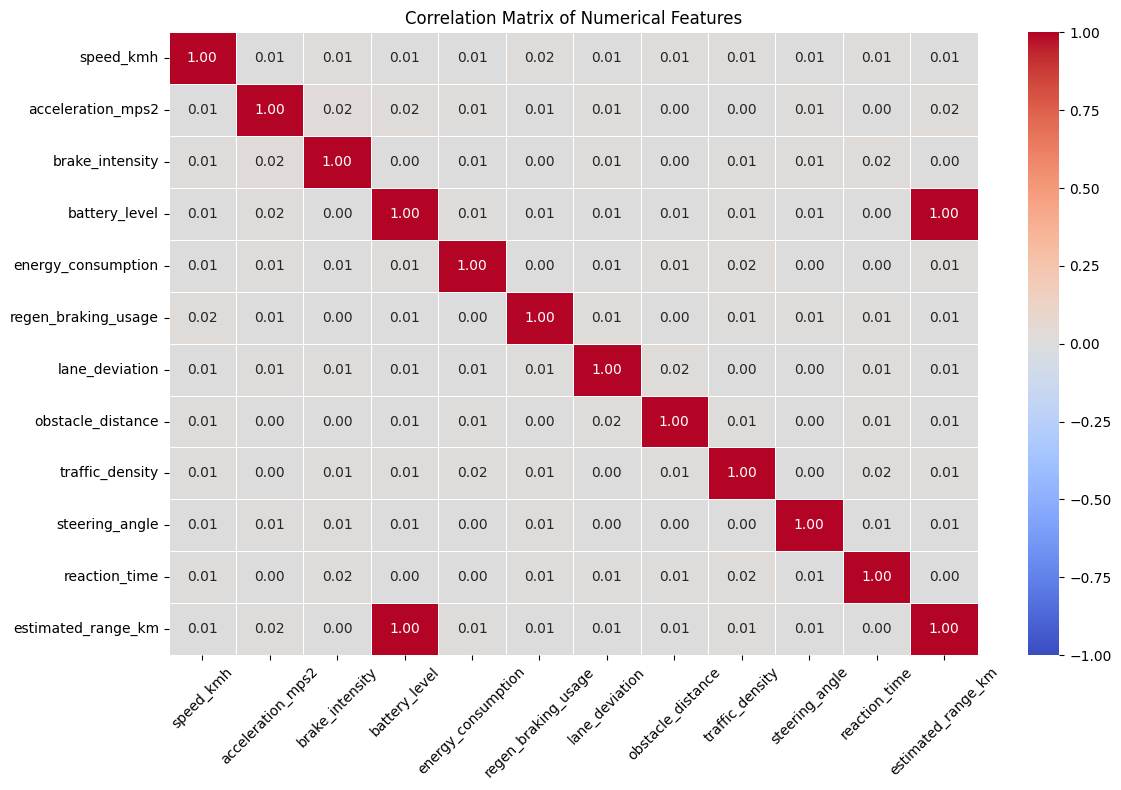

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, vmax=1,
            linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [26]:

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [27]:
high_corr_pairs = [(col, row, upper_tri.loc[row, col]) 
                   for col in upper_tri.columns 
                   for row in upper_tri.index 
                   if (upper_tri.loc[row, col] > 0.8)]

# Show results
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} ⬌ {col2} = {corr_value:.2f}")


estimated_range_km ⬌ battery_level = 1.00
